<a href="https://colab.research.google.com/github/shivamsinghtomar78/ML-Projects-/blob/main/crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/crime data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)
print(y)

[['A & N ISLANDS' 2001 13 ... 0 0 323]
 ['A & N ISLANDS' 2002 17 ... 0 0 328]
 ['A & N ISLANDS' 2003 21 ... 0 0 318]
 ...
 ['WEST BENGAL' 2010 2398 ... 8 2847 49096]
 ['WEST BENGAL' 2011 2109 ... 0 3249 56614]
 ['WEST BENGAL' 2012 2252 ... 12 4385 64482]]
[   658    608    644    748    682    676    807    882    941    980
    793    683 130089 143610 156951 158756 157123 173909 175087 179275
 180441 181438 189780 192522   2342   2228   2061   2256   2304   2294
   2286   2374   2362   2439   2286   2420  36877  36346  38195  40675
  42006  43673  45282  53333  55313  61668  66714  77682  88432  94040
  92263 108060  97850 100665 109420 122669 122931 127453 135896 146614
   3397   3806   2806   2889   3133   3126   3643   3931   3555   3373
   3542   3606  38460  37950  38449  41927  43633  45177  45845  51442
  51370  54958  57218  54598    350    349    338    409    434    435
    425    401    442    378    372    318    239    261    269    198
    243    288    260    248    27

Managing missing value by replacing by mean value

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 2:31])
X[:, 2:31] = imputer.transform(X[:, 2:31])

print(X)

[['A & N ISLANDS' 2001 13.0 ... 0.0 0.0 323.0]
 ['A & N ISLANDS' 2002 17.0 ... 0.0 0.0 328.0]
 ['A & N ISLANDS' 2003 21.0 ... 0.0 0.0 318.0]
 ...
 ['WEST BENGAL' 2010 2398.0 ... 8.0 2847.0 49096.0]
 ['WEST BENGAL' 2011 2109.0 ... 0.0 3249.0 56614.0]
 ['WEST BENGAL' 2012 2252.0 ... 12.0 4385.0 64482.0]]


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = X

transformer = make_column_transformer(
    (OneHotEncoder(), [0]),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
X = transformed

In [6]:
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]
(420, 65)


In [7]:
DF = pd.DataFrame(X)
DF.to_csv("crime(ds).csv")
print(X[0][0])

1.0


CLUSTERING TO FIND OPTIMAL NUMBER OF CLUSTERS

In [8]:
y = np.array(y)
Z = y
U = (X[:, 37:])
A = X[:, 36:]

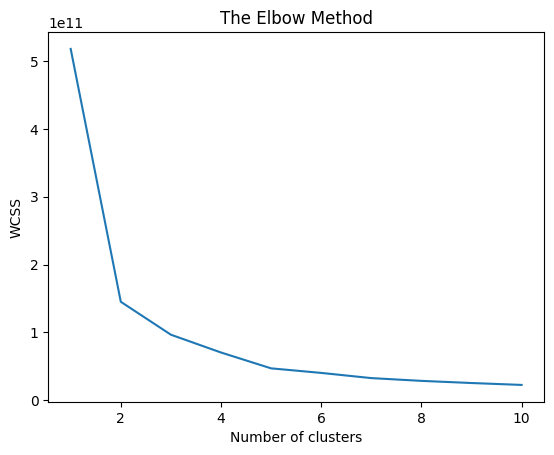

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_init = 10)
y_kmeans = kmeans.fit_predict(A)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_kmeans)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


SPLITTING DATA

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

FEATURE SCALING

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 37:] = sc.fit_transform(X_train[:, 37:])
X_test[:, 37:] = sc.transform(X_test[:, 37:])

ANALYSIS OF CRIME RATE

In [14]:
dataset.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,420.000000,420.000000,420.000000,420.00000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,958.435714,838.040476,106.22381,569.37381,0.061905,569.311905,849.659524,628.350000,221.309524,...,270.723810,8028.276190,217.147619,1078.940476,295.366667,2083.811905,2.123810,2385.390476,23340.069048,57001.557143
std,3.456169,1213.687365,1149.623253,253.86659,694.97765,0.392016,694.930776,1217.488114,966.279578,342.334028,...,357.828308,11603.262625,396.788651,1499.475571,698.715736,3236.534832,8.914278,3665.454858,29320.629427,66193.547043
min,2001.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.000000
25%,2003.750000,46.000000,32.000000,4.00000,29.00000,0.000000,29.000000,37.500000,15.500000,11.750000,...,18.000000,154.750000,1.000000,38.750000,2.000000,11.750000,0.000000,37.000000,693.750000,2408.500000
50%,2006.500000,463.500000,434.000000,29.00000,298.50000,0.000000,298.500000,295.500000,228.000000,81.500000,...,110.500000,1834.500000,45.000000,374.000000,28.000000,663.500000,0.000000,463.500000,10414.500000,30116.500000
75%,2009.250000,1461.000000,1302.250000,92.25000,936.00000,0.000000,935.250000,1195.500000,894.750000,287.000000,...,413.000000,11239.500000,273.500000,1662.000000,185.000000,2764.000000,0.000000,3025.000000,41774.750000,109178.500000
max,2012.000000,7601.000000,7964.000000,1616.00000,3425.00000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


SATE VS TOTAL CRIME OVER 10 YEARS

             STATE/UT  TOTAL IPC CRIMES
0       A & N ISLANDS              9102
1      ANDHRA PRADESH           2018981
2   ARUNACHAL PRADESH             27652
3               ASSAM            597764
4               BIHAR           1346293
5          CHANDIGARH             40807
6        CHHATTISGARH            561027
7        D & N HAVELI              4651
8         DAMAN & DIU              2948
9            DELHI UT            633174
10                GOA             32051
11            GUJARAT           1385775
12            HARYANA            595303
13   HIMACHAL PRADESH            154948
14    JAMMU & KASHMIR            259155
15          JHARKHAND            422351
16          KARNATAKA           1481063
17             KERALA           1437459
18        LAKSHADWEEP               743
19     MADHYA PRADESH           2413770
20        MAHARASHTRA           2273436
21            MANIPUR             35072
22          MEGHALAYA             25249
23            MIZORAM             26146


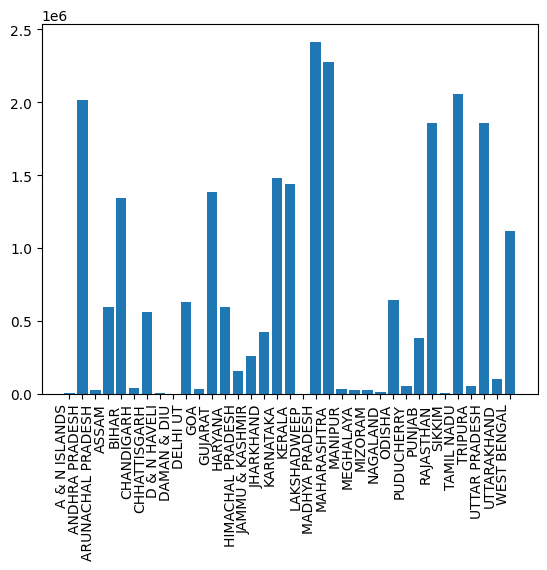

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sum_by_state = dataset.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['TOTAL IPC CRIMES']
print(df_sum_by_state)
fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(states, sum)
plt.show()

TYPE OF CRIME V/S RATE OF THAT CRIME

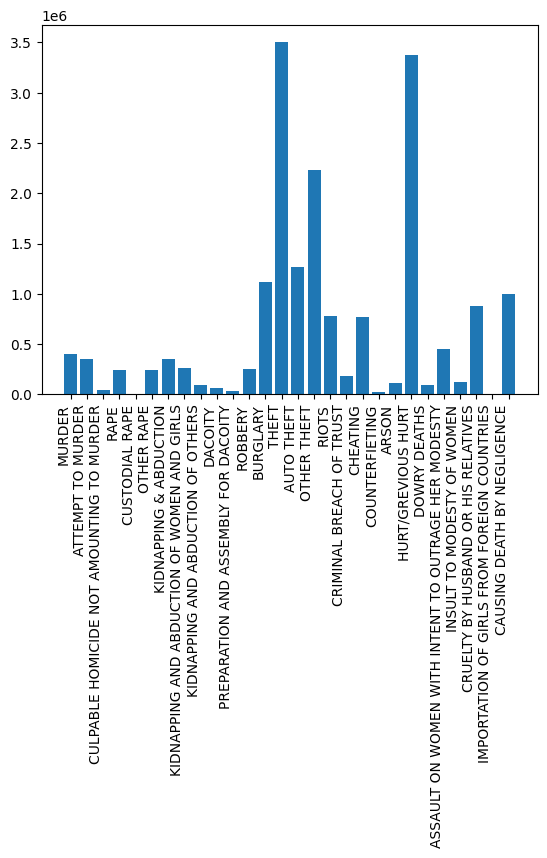

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sum_column = dataset.sum(axis=0)
sum_col = sum_column
f = np.array(sum_col[2:30])
crimes = dataset.columns.values[2:30]

fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(crimes, f)

plt.show()

PIE CHART OF CRIME RATE PER STATE

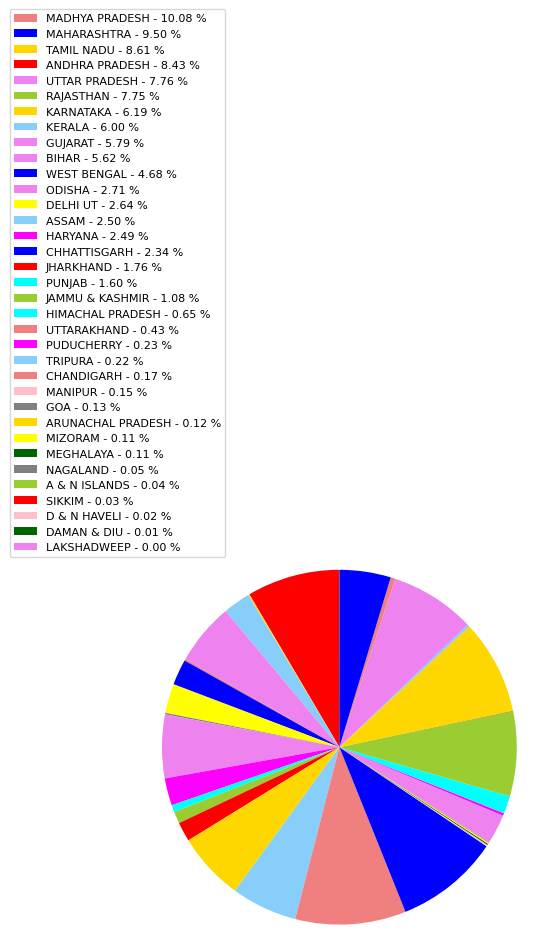

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sum_by_state = dataset.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['TOTAL IPC CRIMES']

x = states
y = sum
colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

ANN

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.2615 - loss: 116.7555
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2743 - loss: 97.6712  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3030 - loss: 79.1173 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3002 - loss: 62.1244 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3184 - loss: 46.5406 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2671 - loss: 37.4341 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3023 - loss: 28.2514 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2590 - loss: 16.9423 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2923 - loss: 9.6700  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4748 - loss: 3.1319 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7627 - loss: 1.4534 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
X_test = np.asarray(X_test).astype('float32')
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[53  8]
 [ 3 20]]


0.8690476190476191

Kernel SVM model

In [23]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  3]
 [ 5 18]]


0.9047619047619048

SVM model

In [26]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[60  1]
 [ 1 22]]


0.9761904761904762

K-NN model

In [27]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[58  3]
 [ 2 21]]


0.9404761904761905

Random Forest Regression

In [28]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[58  3]
 [ 2 21]]


0.9404761904761905

Decision Tree Regression

In [29]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)




# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))





# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[58  3]
 [ 2 21]]


0.9404761904761905

CLASSIFYING STATES AS SAFE/UNSAFE

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


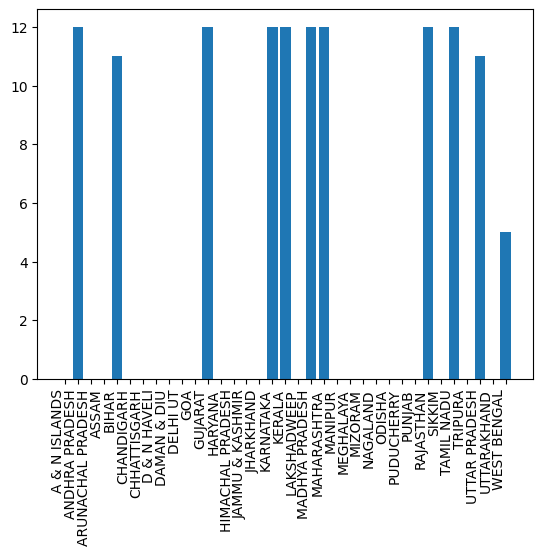

In [30]:
print(y_kmeans)
dataset['category'] = y_kmeans
df_sum_by_state = dataset.groupby('STATE/UT')['category'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['category']
#print(df_sum_by_state)
fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(states, sum)
# Display the resulting DataFrame
plt.show()
#print(dataset.head(10))

In [31]:
import joblib

In [32]:
# Save the column transformer (for one-hot encoding the state)
joblib.dump(transformer, 'transformer.joblib')

# Save the scaler (for scaling crime features)
joblib.dump(sc, 'scaler.joblib')

# Save the SVM classifier (with linear kernel, assuming it’s the best performer)
joblib.dump(classifier, 'svm_classifier.joblib')

['svm_classifier.joblib']